In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("dark")

In [3]:
from sklearn import datasets
dataset = datasets.load_iris()

In [4]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris = dataset.data

In [6]:
data = pd.DataFrame(iris, columns= dataset.feature_names)

In [7]:
target_names = dataset.target_names

In [8]:
data['target'] = dataset.target

In [9]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
conditions = [(data['target'] == 0),(data['target'] == 1),(data['target'] == 2)]
values = target_names

data['target_names'] = np.select(conditions,values)

In [107]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
data_1 = pd.DataFrame(iris, columns= dataset.feature_names)

In [13]:
data_1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


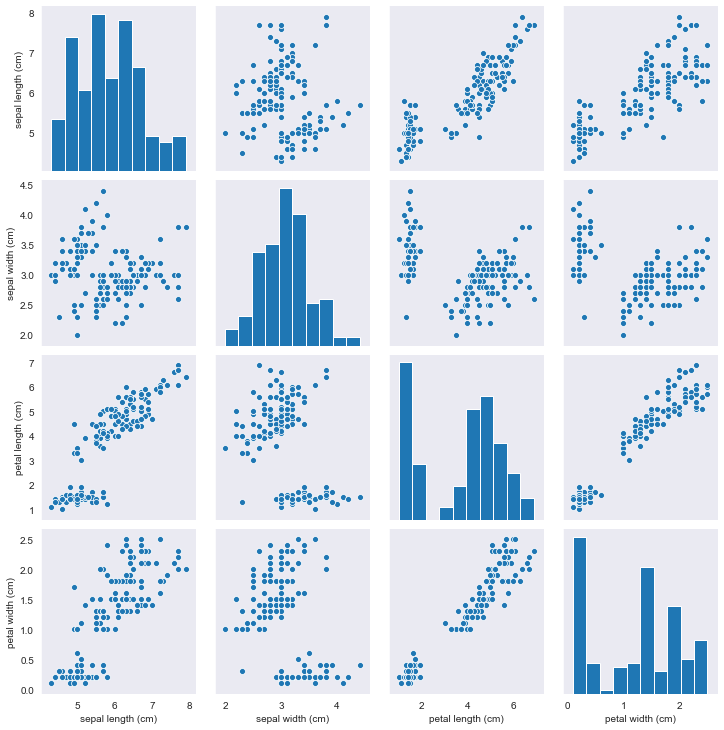

In [15]:
sns.pairplot(data_1)

<Figure size 864x432 with 0 Axes>

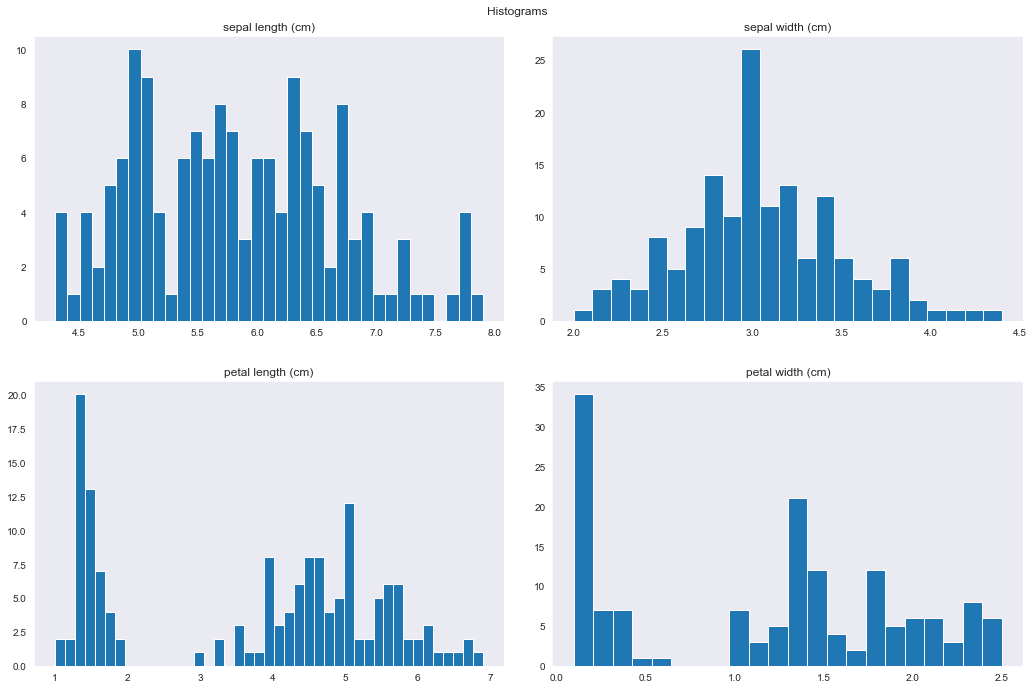

In [21]:
col = data_1.columns

fig,ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.ravel()
fig.suptitle('Histograms')
for i in range(0, data_1.shape[1]):
    ax[i].hist(data_1[col[i]], bins = np.size(data_1.iloc[:,i].unique()))
    ax[i].set_title(col[i])
fig.tight_layout(pad=3.0)

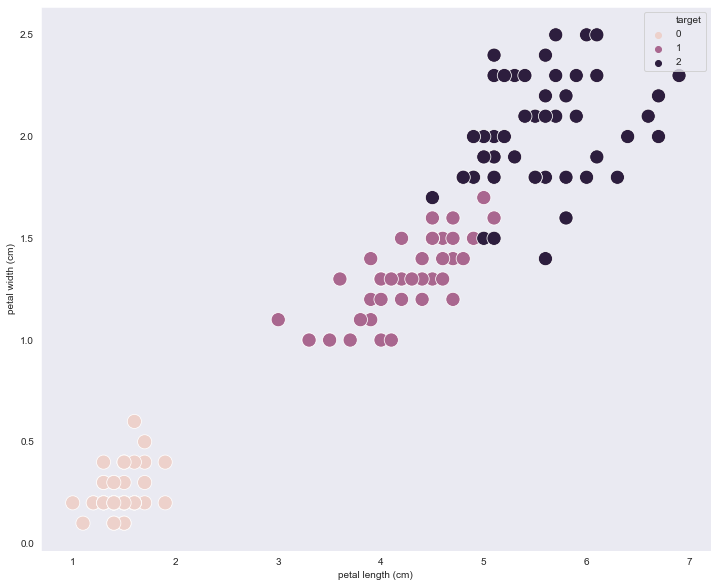

In [30]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',data=data, hue='target', s=200)

In [45]:
data_2 = data_1.drop(columns = ['sepal length (cm)','sepal width (cm)'])

In [46]:
X = data_2

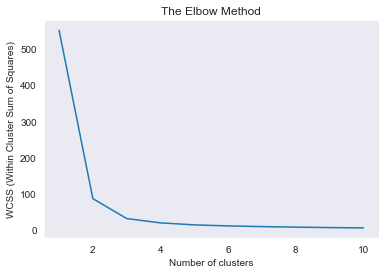

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
centers = kmeans.cluster_centers_

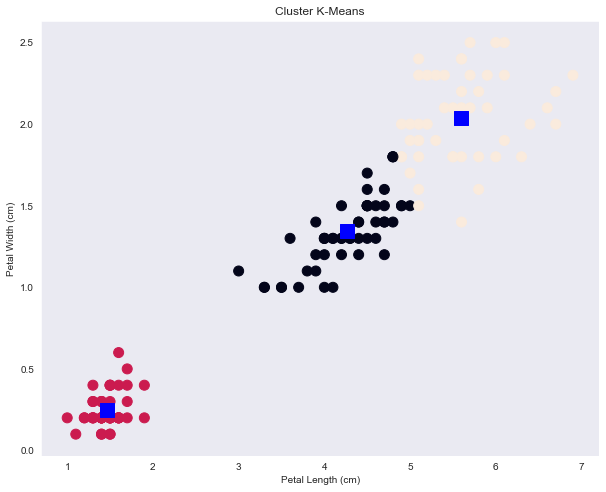

In [56]:
plt.figure(figsize=(10, 8))

plt.scatter(data_1['petal length (cm)'], 
            data_1['petal width (cm)'], 
            c=kmeans.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Cluster K-Means')

plt.show()

In [53]:
from sklearn.metrics import silhouette_score
sil = silhouette_score(X,labels=kmeans.labels_)

In [54]:
sil

0.6604800083974887

In [60]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [61]:
data = data.drop('target_names', axis=1)

In [70]:
data.columns[:-1]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scale = StandardScaler()

In [68]:
data_scaled = scale.fit_transform(data.drop('target', axis=1))

In [71]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns[:-1])

In [75]:
X = data_scaled
y = data.target

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn = KNeighborsClassifier(n_neighbors=2)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [82]:
predictions = knn.predict(X_test)

[[13  0  0]
 [ 0 20  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        20
           2       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45



In [87]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, accuracy_score
print('confusion_matrix\n' + str(confusion_matrix(y_test,predictions)))
print('classification_report\n' + str(classification_report(y_test,predictions)))
print('accuracy_score\n' + str(accuracy_score(y_test,predictions)))


confusion_matrix
[[13  0  0]
 [ 0 20  0]
 [ 0  2 10]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      1.00      0.95        20
           2       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.97      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

accuracy_score
0.9555555555555556


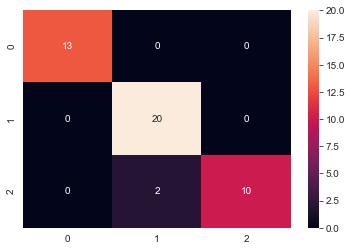

In [90]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier()

In [97]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
predictions = dtree.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, accuracy_score
print('confusion_matrix\n' + str(confusion_matrix(y_test,predictions)))
print('classification_report\n' + str(classification_report(y_test,predictions)))
print('accuracy_score\n' + str(accuracy_score(y_test,predictions)))

confusion_matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

accuracy_score
0.9555555555555556


In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=600)

In [104]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
predictions = rfc.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, accuracy_score
print('confusion_matrix\n' + str(confusion_matrix(y_test,predictions)))
print('classification_report\n' + str(classification_report(y_test,predictions)))
print('accuracy_score\n' + str(accuracy_score(y_test,predictions)))

confusion_matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

accuracy_score
0.9555555555555556


In [108]:
data['species'] = np.select(conditions,values)

In [109]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
